# **Health Insurance Premium Prediction**


Health Insurance is a form of insurance that provides coverage for medical costs. Individuals who have obtained a health insurance policy receive financial protection against medical expenses by paying a specified premium. The premium amount for health insurance is influenced by various factors that contribute to determining the overall cost of the coverage

**Importing Necessary Libraries**

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Loading DataSet**

In [48]:
df = pd.read_csv('/content/Health_insurance.csv')

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Data Wrangling**

**Checking null values**

In [50]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values were found

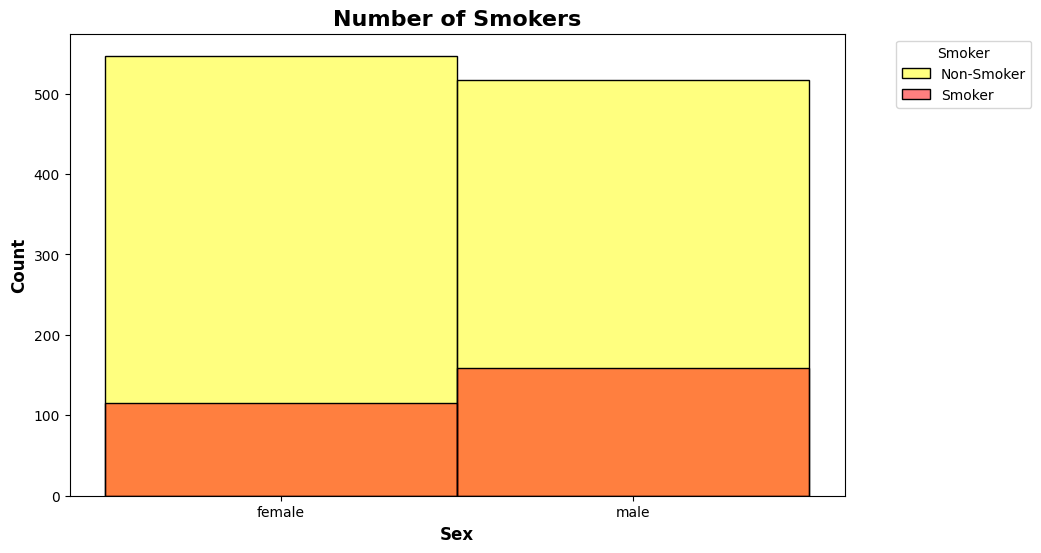

In [51]:
colors = ["red", "yellow"]

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="sex", hue="smoker", palette=colors)

plt.title("Number of Smokers", fontsize=16, fontweight='bold')
plt.xlabel("Sex", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')

legend_labels = ['Non-Smoker', 'Smoker']
plt.legend(title="Smoker", labels=legend_labels, loc="upper right", bbox_to_anchor=(1.25, 1))

plt.show()

**Label Encoding**

In [52]:
df["sex"] = df["sex"].map({"female": 0, "male": 1})
df["smoker"] = df["smoker"].map({"no": 0, "yes": 1})

In [53]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


**Population Distribution by Region**

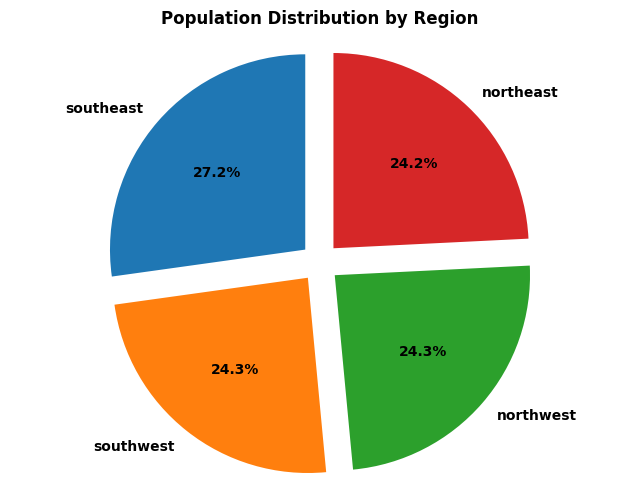

In [54]:
pie = df["region"].value_counts()
regions = pie.index
population = pie.values

explode = [0.1] * len(regions)

sns.set_palette("tab10")

plt.figure(figsize=(8, 6))
plt.pie(population, labels=regions, explode=explode, autopct='%1.1f%%', startangle=90, textprops={'fontweight': 'bold'})

plt.title('Population Distribution by Region', fontweight='bold')

plt.axis('equal')

plt.show()


**Training the Model**

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [68]:
age = float(input("Enter the age: "))
sex = float(input("Enter the sex (0 for female, 1 for male): "))
bmi = float(input("Enter the BMI: "))
smoker = float(input("Enter the smoker status (0 for non-smoker, 1 for smoker): "))

Enter the age: 45
Enter the sex (0 for female, 1 for male): 1
Enter the BMI: 32
Enter the smoker status (0 for non-smoker, 1 for smoker): 0


In [69]:
x = np.array([[age, sex, bmi, smoker]])

In [70]:
features = np.array(df[["age", "sex", "bmi", "smoker"]])
target = np.array(df["charges"])

In [71]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=42)

In [72]:
linear_reg = LinearRegression()

linear_reg.fit(xtrain, ytrain)

ypred = linear_reg.predict(x)

In [73]:
print("Predicted Premium Amount:", ypred[0])

Predicted Premium Amount: 10416.797467044764


The premium amount of a health insurance policy depends on person to person as many factors affect the premium amount of a health insurance policy.